In [76]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('HappinessAlcoholConsumption.csv')

print(df.head())

       Country          Region Hemisphere  HappinessScore  HDI  GDP_PerCapita  \
0      Denmark  Western Europe      north           7.526  928         53.579   
1  Switzerland  Western Europe      north           7.509  943         79.866   
2      Iceland  Western Europe      north           7.501  933         60.530   
3       Norway  Western Europe      north           7.498  951         70.890   
4      Finland  Western Europe      north           7.413  918         43.433   

   Beer_PerCapita  Spirit_PerCapita  Wine_PerCapita  
0             224                81             278  
1             185               100             280  
2             233                61              78  
3             169                71             129  
4             263               133              97  


In [78]:
# Missing Values

print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
Country             0
Region              0
Hemisphere          0
HappinessScore      0
HDI                 0
GDP_PerCapita       0
Beer_PerCapita      0
Spirit_PerCapita    0
Wine_PerCapita      0
dtype: int64


In [79]:
# Cleaning the data frame

df = df.dropna().drop_duplicates()

In [80]:
# Check for data types and structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           122 non-null    object 
 1   Region            122 non-null    object 
 2   Hemisphere        122 non-null    object 
 3   HappinessScore    122 non-null    float64
 4   HDI               122 non-null    int64  
 5   GDP_PerCapita     122 non-null    float64
 6   Beer_PerCapita    122 non-null    int64  
 7   Spirit_PerCapita  122 non-null    int64  
 8   Wine_PerCapita    122 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 8.7+ KB


In [81]:
df.describe()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5.524828,740.877049,91.482836,137.565574,96.598361,66.598361
std,1.148736,149.846124,209.577313,104.817353,81.435028,88.121503
min,3.069000,351.000000,1.029000,1.000000,1.000000,1.000000
25%,4.528250,663.750000,4.134250,38.250000,25.500000,5.000000
50%,5.542000,757.500000,12.016000,125.500000,82.500000,16.000000
75%,6.477000,861.500000,41.990000,224.750000,142.500000,112.750000
max,7.526000,951.000000,953.000000,376.000000,373.000000,370.000000


In [82]:
# Basic Descriptive Statistics

In [83]:
columns = ['HappinessScore', 'HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']

In [84]:
# Loop through each column and calculate the statistics
for column in columns:
    print(f"Statistics for '{column}':")
    
    # Select the column
    data = df[column]
    
    # 1. Central Tendency: Mean, Median, Mode
    mean_val = data.mean()
    median_val = data.median()
    mode_val = data.mode().iloc[0] if not data.mode().empty else np.nan
    
    print(f"  Mean: {mean_val}")
    print(f"  Median: {median_val}")
    print(f"  Mode: {mode_val}")

    # 2. Spread of Data: Standard Deviation and Variance
    std_val = data.std()
    var_val = data.var()
    
    print(f"  Standard Deviation: {std_val}")
    print(f"  Variance: {var_val}")

    # 3. Min, Max, and Range
    min_val = data.min()
    max_val = data.max()
    range_val = max_val - min_val
    
    print(f"  Min: {min_val}")
    print(f"  Max: {max_val}")
    print(f"  Range: {range_val}")

    # 4. Percentiles (25th, 50th, 75th Percentiles)
    percentiles = np.percentile(data.dropna(), [25, 50, 75])
    
    print(f"  25th Percentile: {percentiles[0]}")
    print(f"  50th Percentile (Median): {percentiles[1]}")
    print(f"  75th Percentile: {percentiles[2]}")

    # 5. Summary Statistics using scipy.stats.describe
    summary = stats.describe(data.dropna())
    
    print("\n  Summary Statistics from scipy.stats.describe:")
    print(f"  Count: {summary.nobs}")
    print(f"  Min: {summary.minmax[0]}")
    print(f"  Max: {summary.minmax[1]}")
    print(f"  Mean: {summary.mean}")
    print(f"  Variance: {summary.variance}")
    print(f"  Skewness: {summary.skewness}")
    print(f"  Kurtosis: {summary.kurtosis}")
    print("\n" + "-"*50)

Statistics for 'HappinessScore':
  Mean: 5.524827868852458
  Median: 5.542
  Mode: 5.835
  Standard Deviation: 1.148736054907744
  Variance: 1.3195945238450075
  Min: 3.069
  Max: 7.526
  Range: 4.457
  25th Percentile: 4.52825
  50th Percentile (Median): 5.542
  75th Percentile: 6.477

  Summary Statistics from scipy.stats.describe:
  Count: 122
  Min: 3.069
  Max: 7.526
  Mean: 5.524827868852458
  Variance: 1.3195945238450075
  Skewness: -0.05428937990378909
  Kurtosis: -0.980222106210467

--------------------------------------------------
Statistics for 'HDI':
  Mean: 740.8770491803278
  Median: 757.5
  Mode: 748
  Standard Deviation: 149.84612371102799
  Variance: 22453.8607912207
  Min: 351
  Max: 951
  Range: 600
  25th Percentile: 663.75
  50th Percentile (Median): 757.5
  75th Percentile: 861.5

  Summary Statistics from scipy.stats.describe:
  Count: 122
  Min: 351
  Max: 951
  Mean: 740.8770491803278
  Variance: 22453.860791220697
  Skewness: -0.658993312940611
  Kurtosis: -0

In [85]:
# visualizing the data

# for column in columns:
#     plt.figure(figsize=(8, 6))
#     plt.hist(df[column].dropna(), bins=20, edgecolor='black')
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()

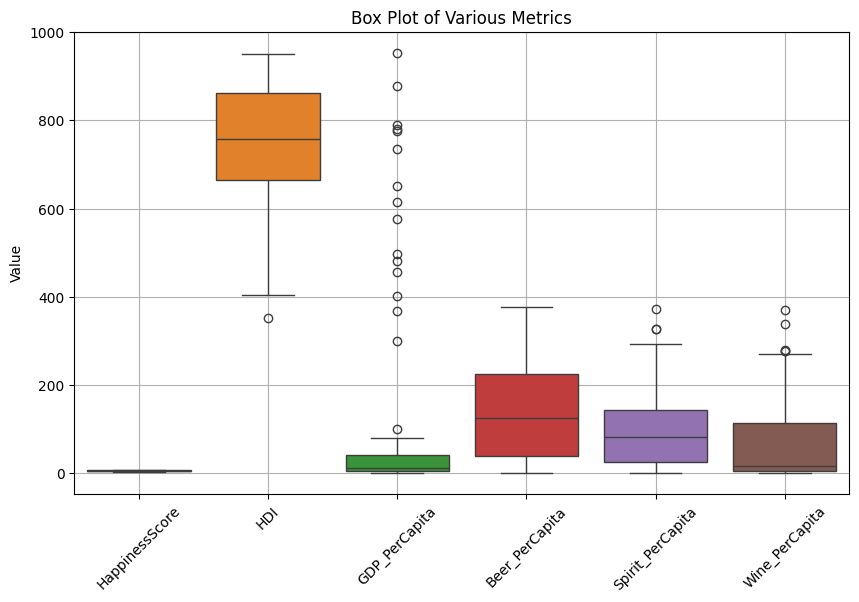

In [86]:
# Box Plots

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns])
plt.title('Box Plot of Various Metrics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [87]:
#  Scatter Plots

# for i, column1 in enumerate(columns):
#     for column2 in columns[i+1:]:
#         plt.figure(figsize=(8, 6))
#         plt.scatter(df[column1], df[column2], alpha=0.5)
#         plt.title(f'Scatter Plot of {column1} vs {column2}')
#         plt.xlabel(column1)
#         plt.ylabel(column2)
#         plt.grid(True)
#         plt.show()

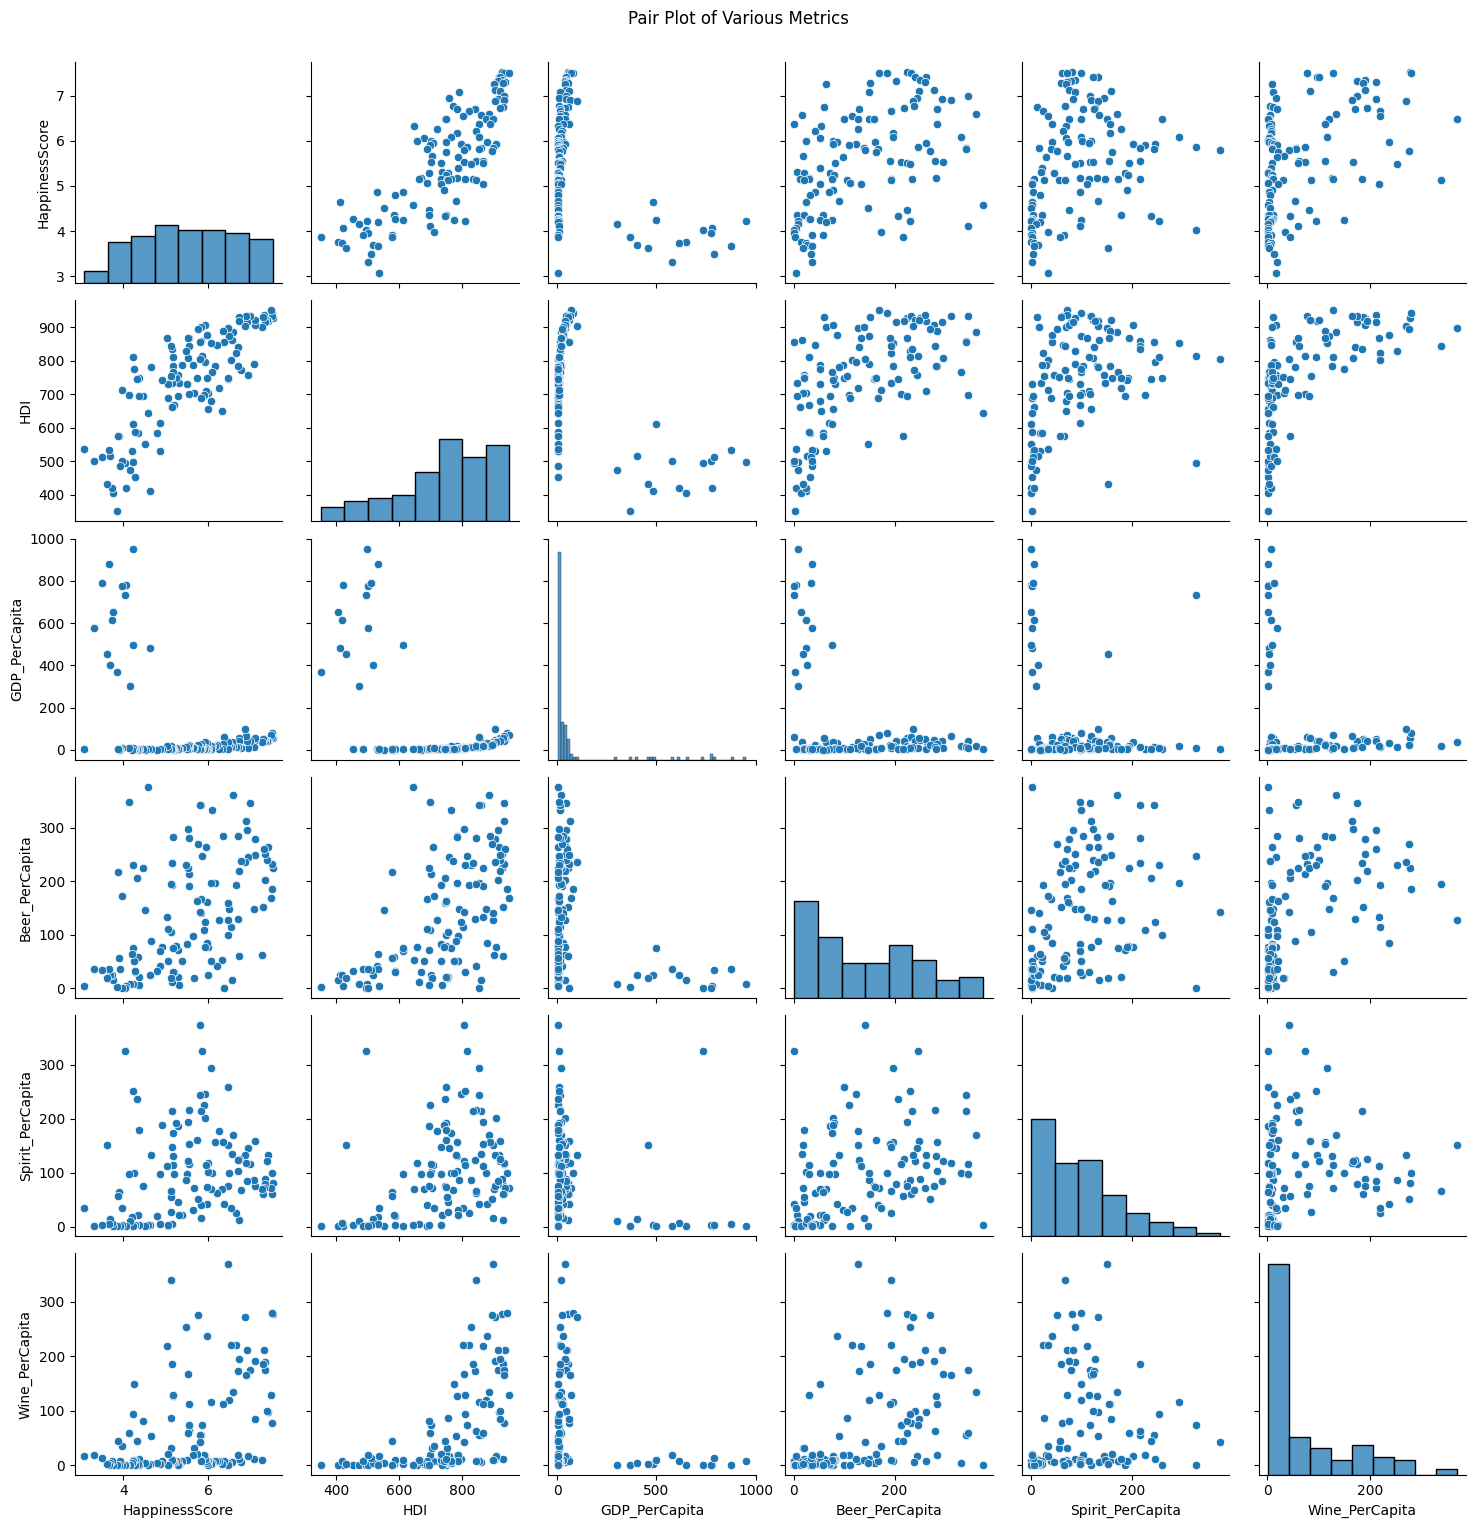

In [88]:
# Pair Plot

sns.pairplot(df[columns])
plt.suptitle('Pair Plot of Various Metrics', y=1.02)
plt.show()

In [89]:
# Bar Plots

# mean_values = df[columns].mean()
# plt.figure(figsize=(10, 6))
# mean_values.plot(kind='bar')
# plt.title('Average Values of Different Metrics')
# plt.xlabel('Metric')
# plt.ylabel('Average Value')
# plt.grid(True)
# plt.show()


In [90]:
# Bar Plots Seaborn

# mean_values = df[columns].mean().reset_index()
# mean_values.columns = ['Metric', 'Average Value']

# plt.figure(figsize=(10, 6))
# sns.barplot(x='Metric', y='Average Value', data=mean_values, palette='pastel')
# plt.title('Average Values of Different Metrics', fontsize=15)
# plt.xlabel('Metric', fontsize=12)
# plt.ylabel('Average Value', fontsize=12)
# plt.xticks(rotation=45, fontsize=10)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()




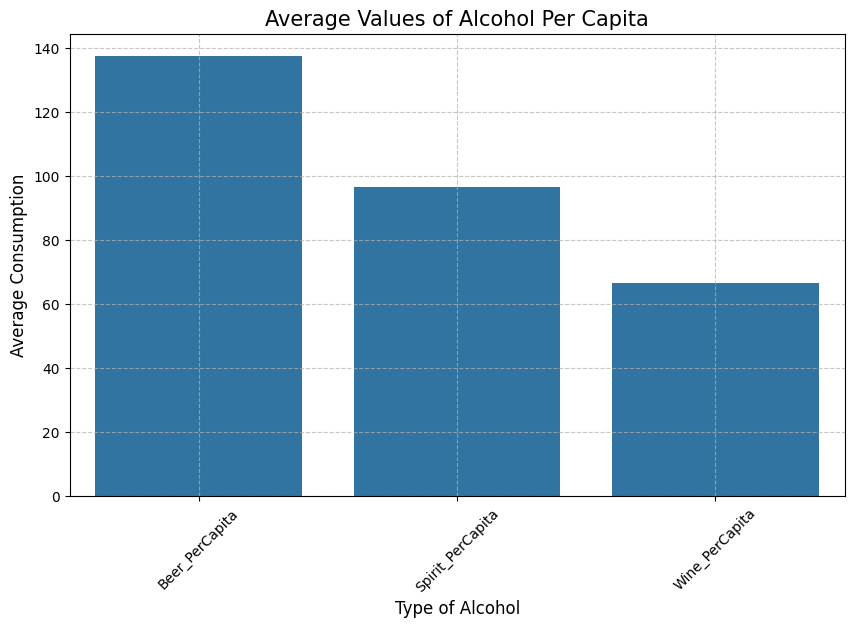

In [91]:
# Select columns of interest
columns = ['Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']

# Calculate mean values for these columns
mean_values = df[columns].mean().reset_index()
mean_values.columns = ['Metric', 'Average Value']

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Average Value', data=mean_values)

plt.title('Average Values of Alcohol Per Capita', fontsize=15)
plt.xlabel('Type of Alcohol', fontsize=12)
plt.ylabel('Average Consumption', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()